This is continuing off of FTSCenterEllipse. It deals with changing coordinates for multiple ellipses, and restricting the size of the ellipse to match the actual FTS. 

Mira

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun import *

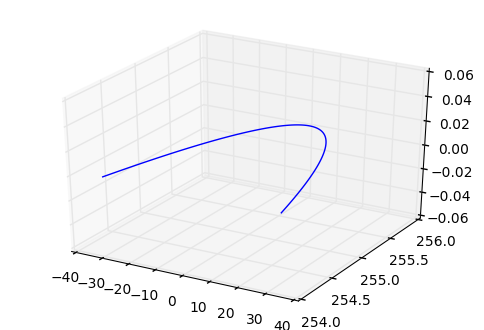

In [2]:
pl3d = pl.figure().gca(projection = '3d')
x,y1,y2,z = createellipsebounded([263.9,256,64.15],64.15)
pl3d.plot(x,y1,z)
pl.show()

In [3]:
#make a plane that is centered at NOT 0,0,0
def make_planecenter(C,x,y,r):
    coeff1 = numpy.array(C)
    r = int(r)
    xp, yp = numpy.meshgrid(range(x-r,x+r), range(x-r,x+r))
    zp = (-coeff1[0]*xp - coeff1[1]*yp + coeff1[3])/coeff1[2]
    return xp,yp,zp

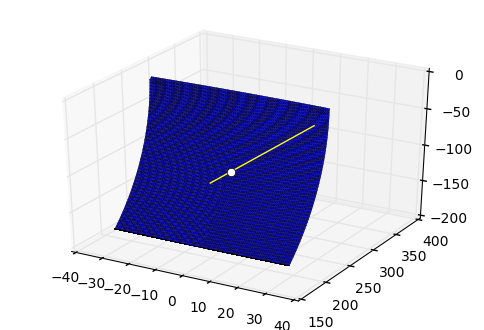

In [4]:
pl3dsurf = pl.figure().gca(projection = '3d')
coeffellipse = [263.9,256,64.15]
X,Y,Z = createzbounded(50,np.pi/4, coeffellipse, 64.15)
X.pop(0)
Y.pop(0)
Z.pop(0)
pl3dsurf.plot_trisurf(X,Y,Z, linewidth = .2, antialiased=True)
pli = [0,200,-100] #(x0,y0,z0)
v1 = [0.01,1,.01] #(a,b,c)
L = int(200)
xline,yline,zline = make_line(pli,v1,L)
pl3dsurf.plot(xline,yline,zline, color = 'yellow')
xint,yint,zint = ellipselineint(pli,v1,coeffellipse)
pl3dsurf.plot([xint[0]],[yint[0]],[zint[0]], marker = 'o', color = 'white')
xp,yp,zp= tangplane(pli,v1,coeffellipse,100)
#pl3dsurf.plot_surface(xp,yp,zp, alpha = .2)
pl.show()

In [5]:
c = tangcoef(pli,v1,coeffellipse)
r = int(100)
p = [0,200,-100] #(x0,y0,z0)
v = [0.01,1,.01] #(a,b,c)
L = int(200)
coeffellipse = [263.9,256,64.15]
xi,yi,zi,xr,yr,zr,xp,yp,zp  = reflectellipse(coeffellipse,r,v,p,L)
xint,yint,zint = ellipselineint(p,v,coeffellipse)


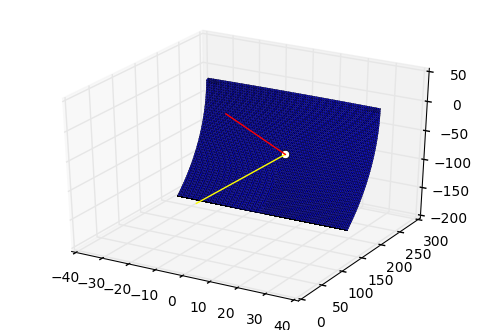

In [6]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot([xint[0]],[yint[0]],[zint[0]], marker = 'o', color = 'white')
#pl3dsurf.plot(xline,yline,zline, color = 'yellow')
pl3dsurf.plot(xi,yi,zi, color = 'yellow')
pl3dsurf.plot(xr,yr,zr, color = 'red')
pl3dsurf.plot_trisurf(X,Y,Z, linewidth = .2, antialiased=True)
#pl3dsurf.plot_surface(xp,yp,zp, alpha = .2)
pl.show()

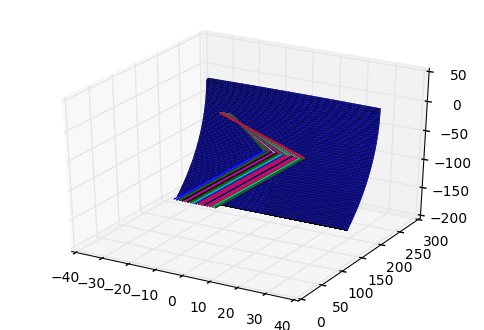

In [7]:
#will now try with a source! 
pl3d = pl.figure().gca(projection = '3d')
#try to show source reflected off of one flat surface (ASSUMING THIS IS CORRECT?)
axis = [0,200,8] #hkr
x,y,z=shape_source(axis,-100)
#pl3d.plot_surface(xp,yp,zp, alpha = .2)

points = list_points(x,y,z)
xi,yi,zi,xr,yr,zr,xp,yp,zp = reflect_sourceellipse(coeffellipse,r,v,points,L)
for n in range (0,len(list_points(x,y,z))):
    pl3d.plot(xi[n],yi[n],zi[n])
    pl3d.plot(xr[n],yr[n],zr[n])
pl3d.plot_trisurf(X,Y,Z, linewidth = .2, antialiased=True)
ax=pl.gca()
ax.hold(True)
pl.show()